# Title: Cloud Instances Recommender for Stand-alone memory-intensive Class Application

# Load Library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

# Read Dataset 

In [2]:
# dataset best case a2cloud score 
df_train = pd.read_csv("standalone_memory_a2cloudscore.csv")
# scala verification dataset  
df_scala = pd.read_csv("standalone_memory_a2cloudscore_scala_runtime_verfi.csv")

df_train

a2cloud_score  Cost(per hour USD)    Instance
0          4.873968              0.0928    t2.large
1          6.531882              0.0832        B2ms
2          9.609185              0.0950        N1s2
3         10.000000              0.0150       Lin.G
4          5.085807              0.1000    c4.large
...             ...                 ...         ...
1195       6.324760              0.0230    t2.small
1196       1.000000              0.0752   t3a.large
1197       1.168738              0.0376  t3a.medium
1198       2.469611              0.0188   t3a.small
1199       5.284107              0.0208    t3.small

[1200 rows x 3 columns]

In [3]:
df_train = shuffle(df_train)

df_train=df_train.append(df_scala)# add verification: Kmeans and plot purposes 


# Data Plot 

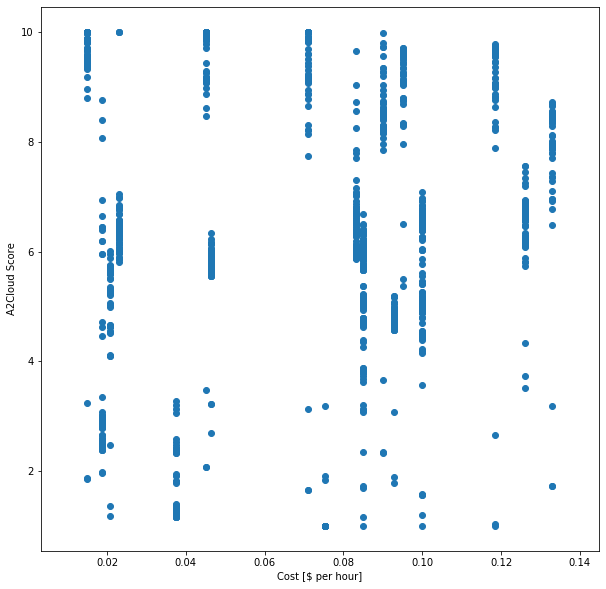

In [4]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df_train.iloc[:,1:2],df_train.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')
plt.show()

# K Means 

In [5]:
X=df_train.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [6]:
df_train['cluster']=labels

# Clusters Plot

Text(0, 0.5, 'A2Cloud Score')

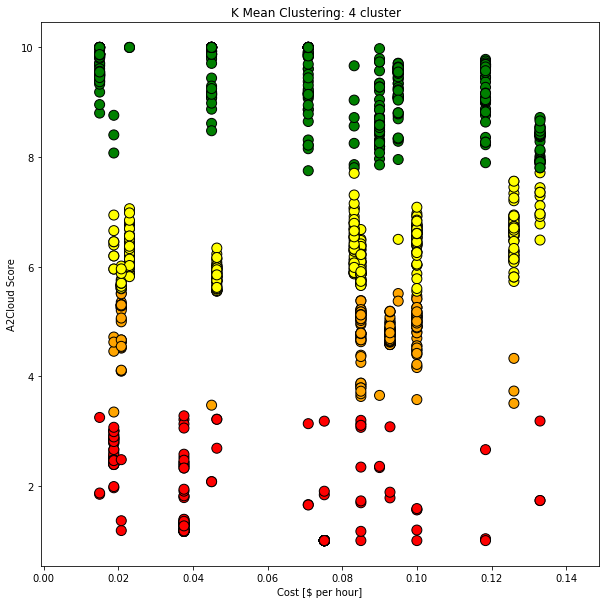

In [7]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df_train.iloc[:,1:2], df_train.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

In [8]:
### Cluster Number conversion: 4-excellent, 3-good, 2-avg, 1- bad

In [9]:
df_train.head(10)

a2cloud_score  Cost(per hour USD)   Instance  cluster
1168       8.392074              0.1330   r4.large        0
316        1.000000              0.0752  t3a.large        1
703        9.855300              0.0150      Lin.G        0
670        9.461298              0.1184       N1M2        0
462        8.331257              0.0950       N1s2        0
380        4.807231              0.0928   t2.large        3
1043       8.801770              0.0150      Lin.G        0
1192       4.757761              0.0850   c5.large        3
614        5.567884              0.0464  t2.medium        2
451        9.204745              0.0900      Lin.M        0

In [11]:
#dataset save as csv file
df_train.to_csv(r'dataset_new.csv',index=False)
df_new = pd.read_csv("dataset_new.csv")
df1=df_new

# check cluster label and set manually to each run
df_new=df_new.replace({'cluster':0},5)
df_new=df_new.replace({'cluster':1},8)
df_new=df_new.replace({'cluster':2},6)
df_new=df_new.replace({'cluster':3},7)

df_new=df_new.replace({'cluster':5},1)
df_new=df_new.replace({'cluster':6},2)
df_new=df_new.replace({'cluster':7},3)
df_new=df_new.replace({'cluster':8},4)

In [12]:
df_new.head(10)

a2cloud_score  Cost(per hour USD)   Instance  cluster
0       8.392074              0.1330   r4.large        1
1       1.000000              0.0752  t3a.large        4
2       9.855300              0.0150      Lin.G        1
3       9.461298              0.1184       N1M2        1
4       8.331257              0.0950       N1s2        1
5       4.807231              0.0928   t2.large        3
6       8.801770              0.0150      Lin.G        1
7       4.757761              0.0850   c5.large        3
8       5.567884              0.0464  t2.medium        2
9       9.204745              0.0900      Lin.M        1

In [13]:
df_train=df_new
df_train

a2cloud_score  Cost(per hour USD)    Instance  cluster
0          8.392074              0.1330    r4.large        1
1          1.000000              0.0752   t3a.large        4
2          9.855300              0.0150       Lin.G        1
3          9.461298              0.1184        N1M2        1
4          8.331257              0.0950        N1s2        1
...             ...                 ...         ...      ...
1255      10.000000              0.0230    t2.small        1
1256       1.900873              0.0752   t3a.large        4
1257       1.937073              0.0376  t3a.medium        4
1258       1.986097              0.0188   t3a.small        4
1259       1.362533              0.0208    t3.small        4

[1260 rows x 4 columns]

# Training 

In [14]:
xtrain=df_train[['a2cloud_score','Cost(per hour USD)']]
xtrain=xtrain[0:960]
ytrain=df_train['cluster'].values.tolist()
ytrain=ytrain[0:960]

In [15]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing 

In [16]:
xtest=df_train[['a2cloud_score','Cost(per hour USD)']]
xtest=xtest[960:1200]
b=df_train['cluster'].values.tolist()

y_actual=b[960:1200]


In [17]:
y_pred = classifier.predict(xtest)


In [18]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 99.58333333333333 %


In [19]:
print(confusion_matrix(y_pred, y_actual))


[[85  1  0  0]
 [ 0 79  0  0]
 [ 0  0 39  0]
 [ 0  0  0 36]]


In [20]:
print(classification_report( y_pred,y_actual))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        86
           2       0.99      1.00      0.99        79
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        36

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



# Confusion Matrix

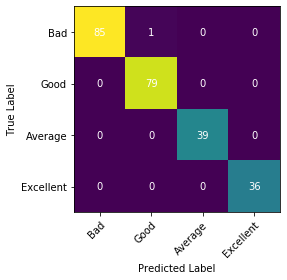

In [21]:
a_label = ["Bad","Good","Average","Excellent"]
p_label = ["Bad","Good","Average","Excellent"]

cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

# SCALA VERIFICATION

In [22]:
x_scala=df_scala[['a2cloud_score','Cost(per hour USD)']]
df_train[1200:1260]

a2cloud_score  Cost(per hour USD)    Instance  cluster
1200       1.779287              0.0928    t2.large        4
1201       9.038401              0.0832        B2ms        1
1202       5.508525              0.0950        N1s2        3
1203       1.845338              0.0150       Lin.G        4
1204       1.565042              0.1000    c4.large        4
1205       1.690335              0.0850         F2s        4
1206       1.656208              0.0709        N1cc        4
1207       2.075739              0.0450       Lin.C        4
1208       1.729807              0.1330    r4.large        4
1209       3.504518              0.1260         E2s        3
1210       1.033747              0.1184        N1M2        4
1211       2.332437              0.0900       Lin.M        4
1212       1.000000              0.0850    c5.large        4
1213       1.560080              0.1000    m4.large        4
1214       2.685426              0.0464   t2.medium        4
1215      10.000000              0.0230    t2.small        1
1216       1.836081              0.0752   t3a.large        4
1217       1.902415              0.0376  t3a.medium        4
1218       1.964006              0.0188   t3a.small        4
1219       1.183193              0.0208    t3.small        4
1220       3.076447              0.0928    t2.large        4
1221       9.664891              0.0832        B2ms        1
1222       6.497144              0.0950        N1s2        2
1223       3.247461              0.0150       Lin.G        4
1224       1.000000              0.1000    c4.large        4
1225       3.103549              0.0850         F2s        4
1226       3.133766              0.0709        N1cc        4
1227       3.471247              0.0450       Lin.C        3
1228       3.181795              0.1330    r4.large        4
1229       4.325151              0.1260         E2s        3
1230       2.659698              0.1184        N1M2        4
1231       3.649722              0.0900       Lin.M        3
1232       2.341293              0.0850    c5.large        4
1233       3.573167              0.1000    m4.large        3
1234       3.214890              0.0464   t2.medium        4
1235      10.000000              0.0230    t2.small        1
1236       3.179371              0.0752   t3a.large        4
1237       3.277306              0.0376  t3a.medium        4
1238       3.346108              0.0188   t3a.small        3
1239       2.476856              0.0208    t3.small        4
1240       1.883160              0.0928    t2.large        4
1241       8.719943              0.0832        B2ms        1
1242       5.370360              0.0950        N1s2        3
1243       1.868026              0.0150       Lin.G        4
1244       1.584332              0.1000    c4.large        4
1245       1.724290              0.0850         F2s        4
1246       1.649536              0.0709        N1cc        4
1247       2.074805              0.0450       Lin.C        4
1248       1.731924              0.1330    r4.large        4
1249       3.728861              0.1260         E2s        3
1250       1.000000              0.1184        N1M2        4
1251       2.354525              0.0900       Lin.M        4
1252       1.168617              0.0850    c5.large        4
1253       1.192258              0.1000    m4.large        4
1254       3.212885              0.0464   t2.medium        4
1255      10.000000              0.0230    t2.small        1
1256       1.900873              0.0752   t3a.large        4
1257       1.937073              0.0376  t3a.medium        4
1258       1.986097              0.0188   t3a.small        4
1259       1.362533              0.0208    t3.small        4

In [23]:
y_pred = classifier.predict(x_scala)


In [24]:
y_actual=b[1200:1260]
y_pred

array([4, 1, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1,
       2, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 1, 4, 4, 4, 4, 4, 1, 3, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4])

In [25]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 95.0 %


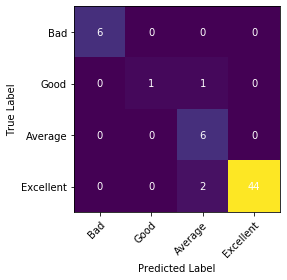

In [26]:
a_label = ["Bad","Good","Average","Excellent"]
p_label = ["Bad","Good","Average","Excellent"]

#harvest = np.array([[4,0,0],[0,0,0], [0,7,1]])
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [27]:
print(classification_report( y_pred,y_actual))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         6
           4       1.00      0.96      0.98        46

    accuracy                           0.95        60
   macro avg       0.92      0.86      0.86        60
weighted avg       0.97      0.95      0.95        60



In [28]:
print(confusion_matrix(y_pred, y_actual))


[[ 6  0  0  0]
 [ 0  1  1  0]
 [ 0  0  6  0]
 [ 0  0  2 44]]


# Get Instance Suggestion for New application: Input=[A2Cloud_score, cost_per_hour]

In [30]:
# Input from user http://localhost:8888/notebooks/Desktop/Cloud_Instance_recommender/Stand-alone%20Model%20/NB_3application_class/Balanced/stand_alone_balanced_NB.ipynb#Get-Instance-Suggestion-for-New-application:-Input=[A2Cloud_score,-cost_per_hour]

A2Cloud_score = float(input(' A2Cloud Score (1 to 10): '))
cost = float(input('Cost of instance (per hour): '))

# prediction function implementation
def Prediction(A2Cloud_score,cost):
    y_pred = classifier.predict((np.array([A2Cloud_score,cost])).reshape(1, -1))[0]
    return y_pred
    
# prediction function call 
guess_cluster=Prediction(A2Cloud_score,cost) 

#slice dataset based on the predicited cluster 
training=df_train[0:960]
training=training[training['cluster']==guess_cluster]

 A2Cloud Score (1 to 10): 2.02
Cost of instance (per hour): 0.10


### Mulitple Instance Recommendation

In [31]:
# calculate unique instances name in the predicted cluster 
instance=training['Instance'].unique()
print("The Recommended Instances are: ",instance)

The Recommended Instances are:  ['t3a.large' 't3a.medium' 't3a.small' 'c5.large']


### Single Instance Recommendation 

In [32]:
instance_single=training.sort_values(by=['a2cloud_score', 'Cost(per hour USD)'])
instance_single=instance_single.iloc[0:1,:]
#z.iloc[0,0:1][0],(z.iloc[0,1:2])[0],(z.iloc[0,2:3])[0]
print("Instance recommendation for your App: ",instance_single.iloc[0,2:3][0] )

Instance recommendation for your App:  t3a.large
